# Regresión Logística Multinomial
## Sergio García Prado

## Ajuste Multinomial
Utilizando las tablas de datos en los ficheros datos1 y datos2 ajusta un modelo de regresión
logística multinomial para predecir el grupo de pertenencia (Y) en función de las variables
explicativas (X1,X2) (Para ello utiliza una modelización tipo Y~X1+X2).

Obtén intervalos de confianza al 95% para los coeficientes de las variables explicativas en el
modelo ajustado por el método de Wald y por el correspondiente a la verosimilitud perfil.

Obtén intervalos de confianza al 95% para la probabilidad de pertenecer al grupo 2 en relación
a la probabilidad de pertenecer al grupo 1 en los valores observados de las variables explicativas.

Para los valores observados de las variables explicativas obtén estimaciones de la probabilidad
de pertenecer a cada uno de los tres grupos.

Clasifica cada individuo al grupo para el que tiene mayor probabilidad a posteriori de pertenecer
y evalúa la clasificación obtenida

Ajusta otros modelos logísticos a los datos y selecciona el que parezca más interesante.

In [1]:
rm(list = ls())

In [2]:
library(nnet)
library(MASS)
library(VGAM)

Loading required package: stats4
Loading required package: splines


### Datos 1

In [3]:
datos1 <- read.table('data/datos1.txt', header = TRUE)
colnames(datos1)[colnames(datos1) == 'G'] <- 'Y'
datos1$Y <- as.factor(datos1$Y)

In [4]:
head(datos1)

X1,X2,Y
0.31,-0.46,1
0.78,4.47,1
-0.21,-0.54,1
0.19,1.65,1
-0.24,0.24,1
1.30,7.59,1


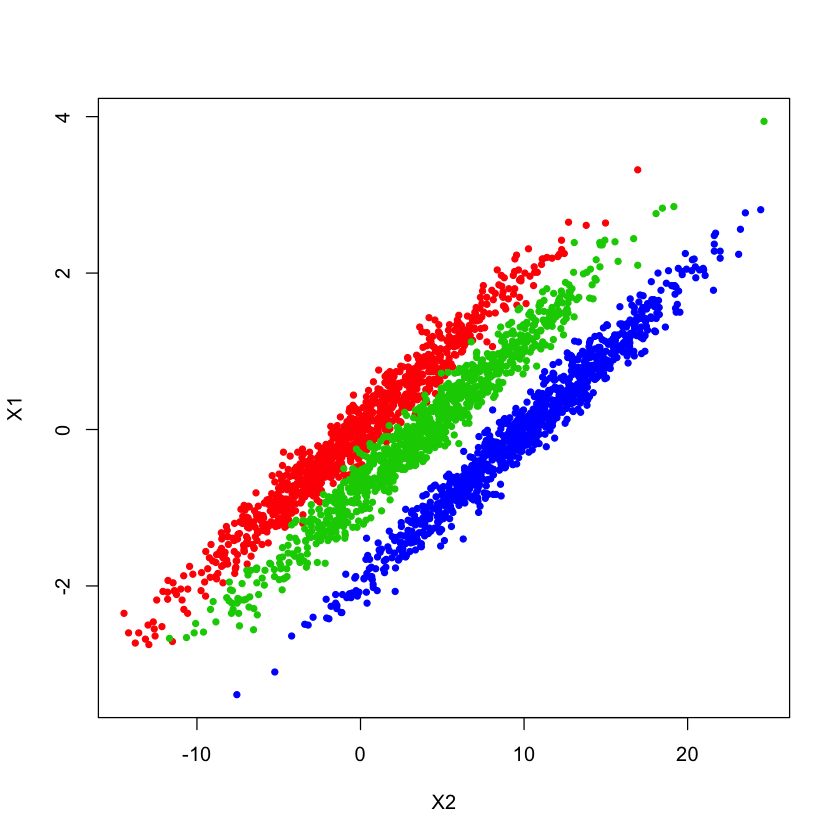

In [5]:
plot(X1 ~ X2, col = as.numeric(Y) + 1, data = datos1, pch=20)

#### Ajuste del Modelo

In [6]:
fit.datos1 <- polr(Y ~ X1 + X2, data=datos1, Hess = TRUE)
summary(fit.datos1)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Call:
polr(formula = Y ~ X1 + X2, data = datos1, Hess = TRUE)

Coefficients:
     Value Std. Error t value
X1 -22.010     1.6226  -13.56
X2   4.396     0.3225   13.63

Intercepts:
    Value    Std. Error t value 
1|2   8.5833   0.6531    13.1430
2|3  30.7540   2.3119    13.3025

Residual Deviance: 249.2769 
AIC: 257.2769 

#### Intervalos de Confianza para Coeficientes

##### Wald

In [7]:
confint.default(fit.datos1)

,2.5 %,97.5 %
X1,-25.189867,-18.829508
X2,3.764435,5.028476


##### Verosimilitud Perfil

In [8]:
confint(fit.datos1)

Waiting for profiling to be done...


,2.5 %,97.5 %
X1,-25.49271,-19.102582
X2,3.81908,5.089052


#### Intervalo de Confianza para la probabilidad de pertenecer al grupo 2 frente a la de pertencer al 1

#### Probabilidades de Pertenencia

In [9]:
prediction.probability.datos1 <- predict(fit.datos1, type="probs")

In [10]:
head(prediction.probability.datos1)

1,2,3
1.0000000,2.696626e-08,0.000000e+00
0.9977593,2.240735e-03,5.282441e-13
0.9982306,1.769374e-03,4.167777e-13
0.9959742,4.025805e-03,9.505730e-13
0.9042905,9.570952e-02,2.489142e-11
0.9786851,2.131487e-02,5.122125e-12


#### Predicciones

In [11]:
prediction.datos1 <- as.vector(apply(prediction.probability.datos1,1, which.max))

In [12]:
sample(prediction.datos1, 15)

[1] 1 2 2 2 3 1 3 3 2 3 2 2 3 3 1

In [13]:
prediction.datos1 <- predict(fit.datos1)

In [14]:
summary(prediction.datos1)

1    2    3 
1001 1000  999

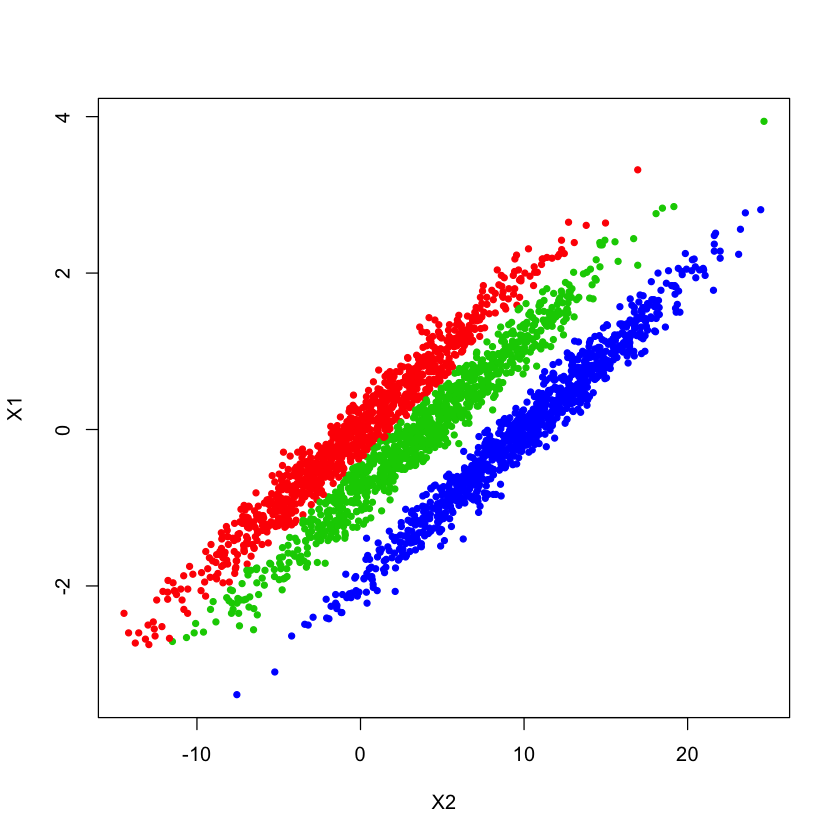

In [15]:
plot(X1 ~ X2, col = as.numeric(prediction.datos1) + 1, data = datos1, pch=20)

#### Otros Modelos

### Datos 2

In [16]:
datos2 <- read.table('data/datos2.txt', header = TRUE)
datos2$Y <- as.factor(datos2$Y)

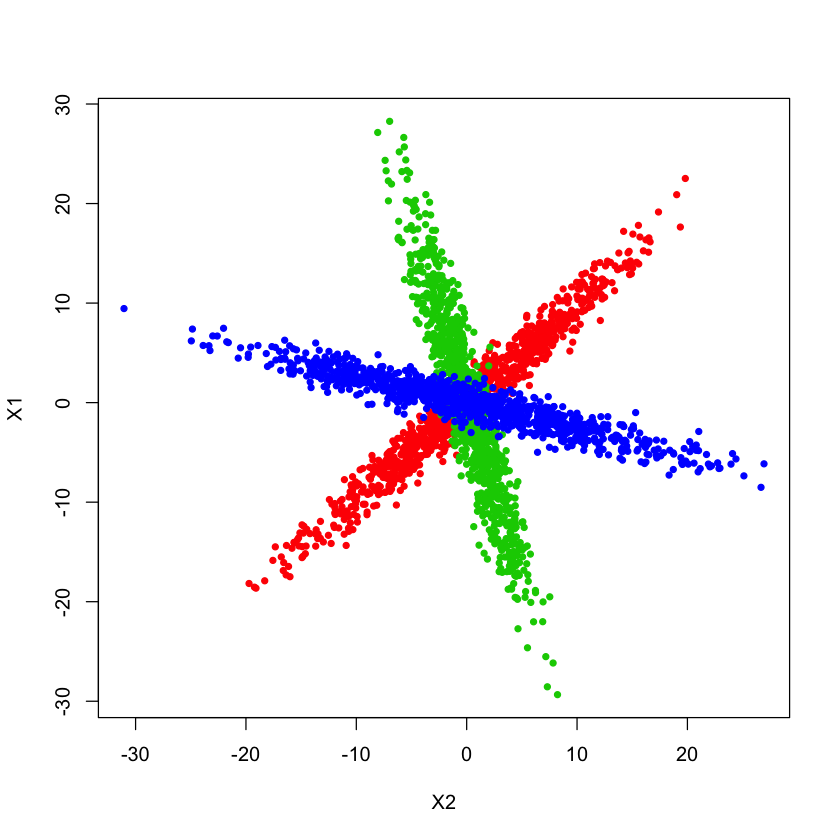

In [17]:
plot(X1 ~ X2, col = as.numeric(Y) + 1, data = datos2, pch = 20)

#### Ajuste del Modelo

In [18]:
fit.datos2 <- multinom(Y ~ X1 + X2, data=datos2, hessian = TRUE, model = TRUE)
summary(fit.datos2)

# weights:  12 (6 variable)
initial  value 3295.836866 
final  value 3295.229689 
converged


Call:
multinom(formula = Y ~ X1 + X2, data = datos2, model = TRUE, 
    hessian = TRUE)

Coefficients:
    (Intercept)           X1           X2
2 -3.443332e-05 -0.003254659 0.0009150342
3 -1.012462e-03 -0.003562986 0.0054936263

Std. Errors:
  (Intercept)          X1          X2
2  0.04472720 0.006389041 0.006424181
3  0.04474904 0.006390339 0.006422763

Residual Deviance: 6590.459 
AIC: 6602.459 

In [19]:
fit <- vglm(Y ~ X1 + X2, data=datos2, family = multinomial(refLevel = "1"))
summary(fit)


Call:
vglm(formula = Y ~ X1 + X2, family = multinomial(refLevel = "1"), 
    data = datos2)


Pearson residuals:
                      Min      1Q Median    3Q   Max
log(mu[,2]/mu[,1]) -1.017 -0.9955 -0.366 1.360 1.394
log(mu[,3]/mu[,1]) -1.016 -0.9957 -0.366 1.339 1.497

Coefficients: 
                Estimate Std. Error z value Pr(>|z|)
(Intercept):1 -3.445e-05  4.473e-02  -0.001    0.999
(Intercept):2 -1.012e-03  4.475e-02  -0.023    0.982
X1:1          -3.255e-03  6.389e-03  -0.509    0.610
X1:2          -3.563e-03  6.390e-03  -0.558    0.577
X2:1           9.150e-04  6.424e-03   0.142    0.887
X2:2           5.494e-03  6.423e-03   0.855    0.392

Number of linear predictors:  2 

Names of linear predictors: log(mu[,2]/mu[,1]), log(mu[,3]/mu[,1])

Residual deviance: 6590.459 on 5994 degrees of freedom

Log-likelihood: -3295.23 on 5994 degrees of freedom

Number of iterations: 3 

No Hauck-Donner effect found in any of the estimates

Reference group is level  1  of the response

#### Intervalos de Confianza para Coeficientes

##### Wald

In [20]:
confintvglm(fit, method = "wald")

,2.5 %,97.5 %
(Intercept):1,-0.087698145,0.087629245
(Intercept):2,-0.088718951,0.086694049
X1:1,-0.015776947,0.009267634
X1:2,-0.016087819,0.008961849
X2:1,-0.011676128,0.013506199
X2:2,-0.007094745,0.018082024


##### Verosimilitud Perfil

In [21]:
confintvglm(fit, method = "profile")

,2.5 %,97.5 %
(Intercept):1,-0.087712326,0.087643292
(Intercept):2,-0.088735070,0.086706281
X1:1,-0.015787603,0.009267436
X1:2,-0.016098992,0.008961114
X2:1,-0.011679830,0.013512900
X2:2,-0.007090896,0.018096243


#### Intervalo de Confianza para la probabilidad de pertenecer al grupo 2 frente a la de pertencer al 1

#### Probabilidades de Pertenencia

In [22]:
prediction.probability.datos2 <- predict(fit.datos2, type="probs")

In [23]:
head(prediction.probability.datos2)

1,2,3
0.3327408,0.3361059,0.3311533
0.3333303,0.3336971,0.3329726
0.3323471,0.3338718,0.3337811
0.3328236,0.3358552,0.3313213
0.3326618,0.3329416,0.3343966
0.3321789,0.3331282,0.3346929


#### Predicciones

In [24]:
prediction.datos2 <- as.vector(apply(prediction.probability.datos2, 1, which.max))

In [25]:
sample(prediction.datos2, 15)

[1] 3 3 1 1 3 1 2 3 1 1 2 1 1 2 2

In [26]:
prediction.datos2 <- predict(fit.datos2)

In [27]:
summary(prediction.datos2)

1    2    3 
1049  583 1368

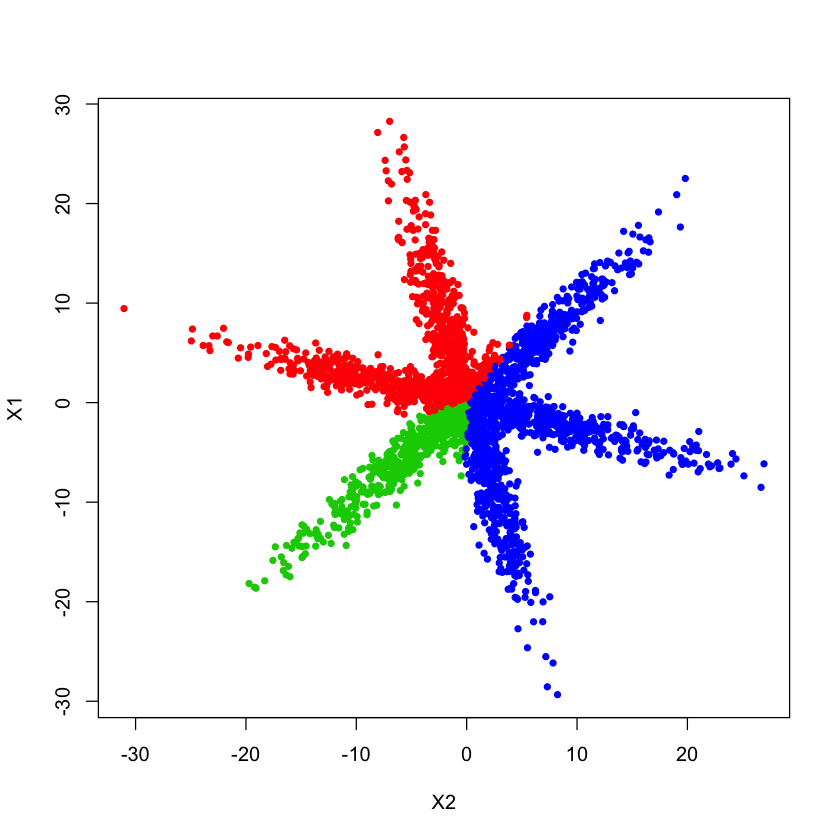

In [28]:
plot(X1 ~ X2, col = as.numeric(prediction.datos2) + 1, data = datos2, pch=20)

#### Otros Modelos

## Simulación

Una justificación para el modelo de odds proporcionales en la modelización por regresión
logística de la relación entre una variable respuesta cualitativa y una variable explicativa
numérica corresponde a que la variable cualitativa provenga de categorizar una variable
numérica con una distribución logística.

Simula 5000 observaciones de este modelo: distribución logística relacionada linealmente con
una variable numérica y categoriza la variable numérica en 4 grupos. Ajusta una regresión
logística multinomial de odds proporcionales a estos datos y relaciona las estimaciones de los
parámetros con los parámetros simulados.

In [29]:
n <- 5000
k <- 4

In [30]:
(n.sampled <- c(rmultinom(1, size=n,prob=rep(1, 4)/4)))

[1] 1247 1317 1196 1240

In [31]:
GenerateSample <- function(n.sampled, min, max) {
    k <- length(n.sampled)
    ranges <- seq(min, max, length = k + 1)
    l <- sapply(1:k, function(i) {
        cbind(i, runif(n.sampled[i], ranges[i] - 3, ranges[i + 1] + 3))
    })
    df <- as.data.frame(do.call("rbind", l))
    colnames(df) <- c('Y', 'X')
    df$Y <- as.factor(df$Y)
    return(df)
}

In [32]:
ordinal.data <- GenerateSample(n.sampled, 0, 100)

In [33]:
ordinal.data <- cbind(ordinal.data, model.matrix( ~ 0 + Y, ordinal.data))

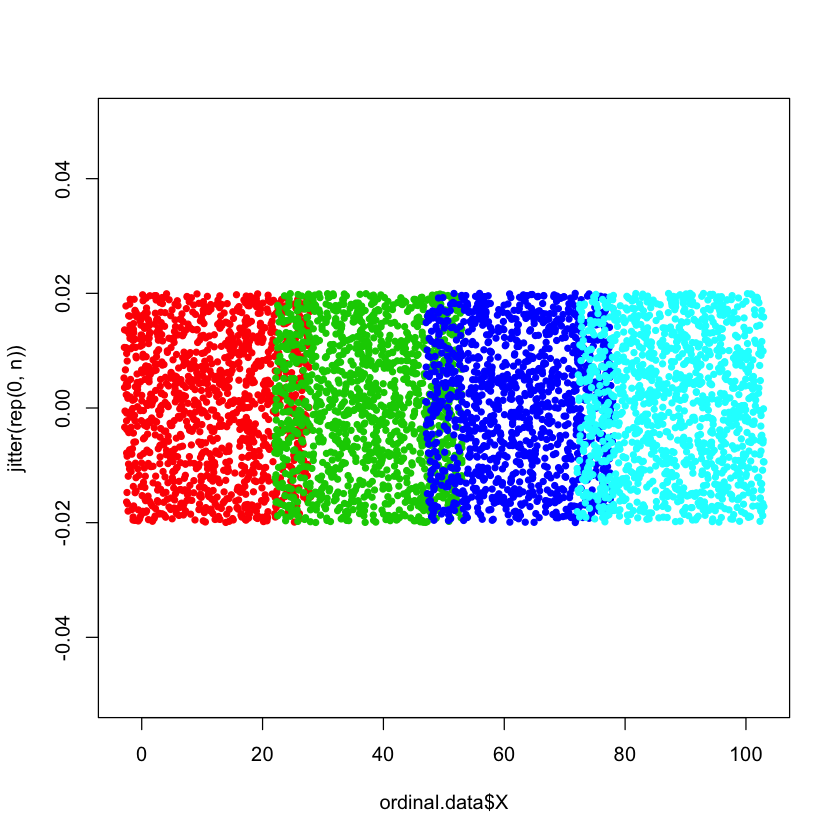

In [34]:
plot(ordinal.data$X, jitter(rep(0,n)), col=as.numeric(ordinal.data$Y) + 1, 
     pch = 20, ylim = c(-0.05, 0.05))

#### Ajuste del Modelo

In [35]:
(fit.ordinal <- polr(Y ~ X,method = "logistic", data=ordinal.data))

Call:
polr(formula = Y ~ X, data = ordinal.data, method = "logistic")

Coefficients:
        X 
0.4985327 

Intercepts:
     1|2      2|3      3|4 
12.35058 25.08432 37.42440 

Residual Deviance: 2441.369 
AIC: 2449.369 

#### Relación de las constantes del modelo con la variable discretizada

La relación entre las constantes $\alpha_j$ estimadas del modelo y las clases generadas es la siguiente: Si dividimos las constantes que "particionan" el espacio en cuatro partes, entre la pendiente $\beta$ ajustada en el modelo, conseguimos el límite superior de las regiones de cada partición. Estos valores pueden ser utilizados en la etapa de predicción para indicar la pertenencia de nuevas observaciones a cada clase, siguiendo la estrategia del modelo logit acumulativo $\mbox{logit} P(Y \le k | x)$.

A continuación se realiza dicho cálculo:

In [36]:
fit.ordinal$zeta / coefficients(fit.ordinal)

1|2      2|3      3|4 
24.77386 50.31630 75.06910

 A continuación se muestran dichas particiones del intervalo junto con las predicciones del modelo:

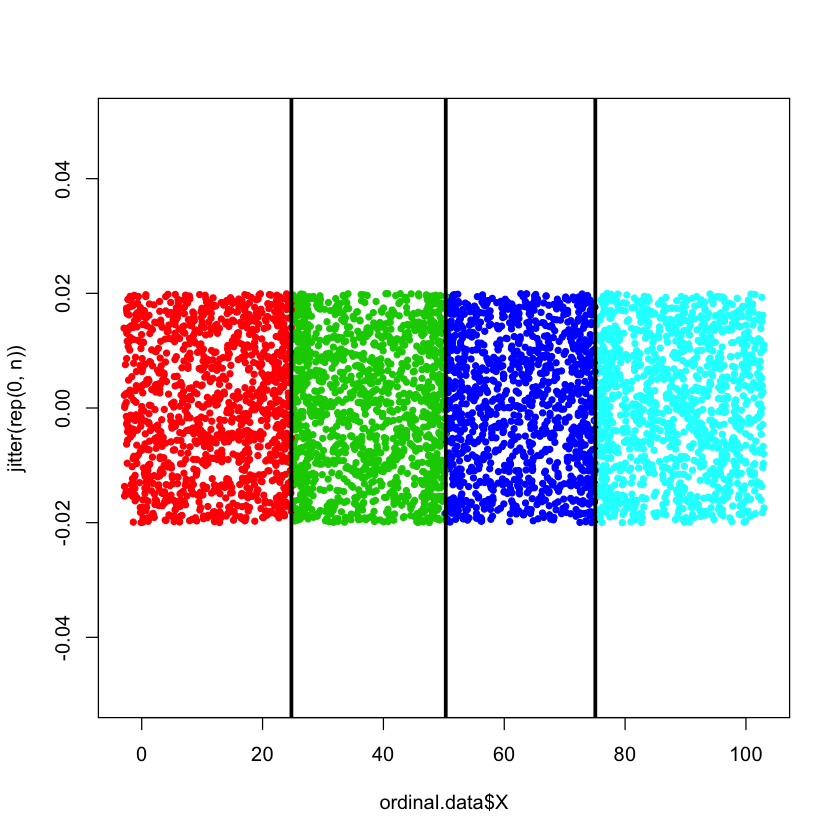

In [37]:
plot(ordinal.data$X, jitter(rep(0,n)), col = as.numeric(predict(fit.ordinal)) + 1, 
     pch = 20, ylim = c(-0.05, 0.05))
abline(v=fit.ordinal$zeta / coefficients(fit.ordinal), lwd = 3)